# FrozenLake-v0

The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.




## Q-learning

Q learning is a type of value-based RL algorithm. Say we had a situation like the one below. We have a robot, that has to go till the end, avoiding the obstacles. Lets say hitting any obstacle gives you a negative reward of -10. Lets say getting to the end gives you a +50 reward. Each step gives you a negative reward of -1, because the goal is to get to the end as quick as possible. 

### The Q-table

A Q-table is just a table that maps out the maximum expected future reward, for each action at each state. Going back to the previous example, a state would just be a block, and an action would basically be which direction you choose to move in from that block. There are 4 possible actions at each state, moving left, right, down, or up.

The Q-table is basically a cheat-sheet for the agent that tells it which action is the best action to take from each state. The Q-table itself improves with each iteration of the game. 


### Q-learning Algorithm 

The Q function has 2 inputs, the state and the action and based on this it computes the maximum expected future reward. Here is the equation for it:

Q-learning can be implemented as follows:

Q(s,a)+=α⋅[r+γ⋅maxαQ(s′)−Q(s,a)]
s: is the previous state

a: is the previous action

Q(): is the Q-learning algorithm

s’: is the current state

alpha: is the learning rate, set generally between 0 and 1. Setting the alpha value to 0 means that the Q-values are never updated, thereby nothing is learned. If we set the alpha to a high value such as 0.9, it means that the learning can occur quickly.

gamma: It is the discount factor that is set between 0 and 1. This model the fact that future rewards are worth less than immediate rewards.

max: is the maximum reward that is attainable in the state following the current one (the reward for taking the optimal action thereafter).

The algorithm can be interpreted as:

Initialize the Q-values table, Q(s, a).

Observe the current state, s.

Take an action, a, for that state based on the selection policy.

Pick that action, and observe the reward, r, as well as the new state, s’.

Now update the Q-value for the state with the help of the observed reward and the maximum reward possible for the next state.

Place the state to the new state, and repeat the process until a terminal state is reached.

Thus, alpha is the learning rate. If the reward or transition function is random, then alpha should change over the period, approaching zero at infinity. This has to effect approximating the expected outcome of an inner product (T(transition)*R(reward)), when one of the two, or both, has random behavior.

Whereas, gamma is the value of future rewards. It can change the learning quite a bit and can be a dynamic or static value. If it is equal to one, the agent values future reward JUST AS MUCH as a current reward. This means, in ten actions, if an agent does something good this is JUST AS VALUABLE as doing this action directly. So learning doesn't work well at high gamma values.

Similarly, a gamma of zero will cause the agent to only value immediate rewards, which only works with very detailed reward functions.

In [1]:
import numpy as np
import gym
import random
from IPython.display import Image
import os

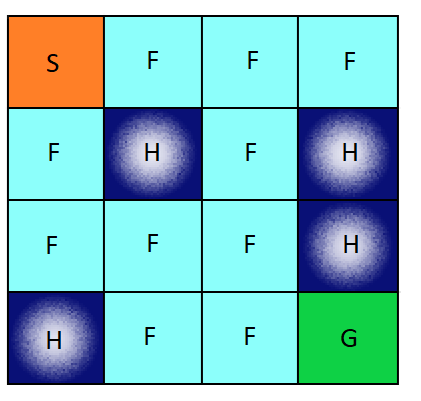

In [2]:
os.chdir(r'N:\ADVANCE DATA SCIENCE\ASSIGNMENTS\Assignment 2')
Image('Frozen-Lake.png')

### Tuning Number of Episodes



In [8]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [2500, 5000, 10000, 15000, 25000, 50000, 70000]


for param in tuning_params:    


    total_episodes = param        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 99                # Max steps per episode

    learning_rate = 0.7           # Learning rate
    gamma = 0.8                 # Discounting rate

    # Exploration parameters
    epsilon = 1.0                 # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Training Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Learning Rate value - " + str(learning_rate))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Training Episodes - 2500
Training Score over time: 0.0
Average Epsilon value is 0, since Max steps are not reached
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score -  0.0
Episode - 7,  Score -  0.0
Episode - 8,  Score -  0.0
Episode - 9,  Score -  0.0
Episode - 10,  Score -  0.0
Episode - 11,  Score -  0.0
Episode - 12,  Score -  0.0
Episode - 13,  Score -  0.0
Episode - 14,  Score -  0.0
Episode - 15,  Score -  

Number of Training Episodes - 15000
Training Score over time: 0.31666666666666665
Average Epsilon value when max steps is reached: 0.01001374961094748
[[2.48373727e-03 6.80288716e-03 2.64429074e-03 1.89243012e-03]
 [7.60651350e-04 1.70757343e-05 1.60464563e-03 7.44077348e-03]
 [1.50005866e-03 5.43234536e-04 1.03281011e-01 5.81464913e-04]
 [3.07186454e-03 2.26045199e-04 5.93384774e-06 9.70494386e-03]
 [5.65207338e-03 1.15523285e-03 1.98891598e-04 1.42390019e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.07735853e-01 1.93977423e-05 8.22038731e-06 2.79723458e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.72119643e-03 1.49672607e-04 6.82105816e-03 6.04245438e-03]
 [1.03678049e-03 1.11455487e-01 3.97114645e-03 6.64411068e-03]
 [4.06496259e-01 3.22741000e-04 1.50184292e-03 5.55694625e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.34574362e-02 3.57436806e-0

Number of Training Episodes - 50000
Training Score over time: 0.32678
Average Epsilon value when max steps is reached: 0.010052218824367376
[[3.68383707e-02 4.59537101e-04 5.30252258e-04 5.24228391e-04]
 [3.29594158e-04 2.18258799e-04 2.10695023e-04 4.49415442e-04]
 [2.26216416e-04 4.95948838e-04 3.90965563e-04 4.45778623e-04]
 [1.42739658e-04 1.48124867e-04 5.34537264e-05 1.66908970e-04]
 [9.77811173e-02 7.61494167e-04 6.26196325e-04 1.72905666e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.45496809e-07 1.10355386e-08 1.40751848e-04 5.29091715e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.57681432e-03 3.30934336e-03 1.00674319e-03 3.15902771e-01]
 [1.43514543e-02 4.80949326e-01 3.34925199e-02 1.72071088e-02]
 [4.68646133e-01 1.26585081e-03 5.88596268e-03 3.96965973e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.89387121e-03 2.16549359e-03 6.2362498

#### The best testing score is 0.65 with Number of Episodes = 50000

### Tuning Maximum Steps (using the best parameters from previous runs)

In [11]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [50, 100, 200, 400, 500]


for param in tuning_params:    


    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = param                # Max steps per episode

    learning_rate = 0.7           # Learning rate
    gamma = 0.8                 # Discounting rate

    # Exploration parameters
    epsilon = 1.0                 # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Max Steps - " + str(max_steps))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Learning Rate value - " + str(learning_rate))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Max Steps - 50
Training Score over time: 0.0
Average Epsilon value when max steps is reached: 0.010178107198008015
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score -  0.0
Episode - 7,  Score -  0.0
Episode - 8,  Score -  0.0
Episode - 9,  Score -  0.0
Episode - 10,  Score -  0.0
Episode - 11,  Score -  0.0
Episode - 12,  Score -  0.0
Episode - 13,  Score -  0.0
Episode - 14,  Score -  0.0
Episode - 15,  Score -  

Number of Max Steps - 400
Training Score over time: 0.32808
Average Epsilon value is 0, since Max steps are not reached
[[6.82113332e-02 1.76861437e-04 1.14246325e-04 1.85956727e-04]
 [6.18420669e-05 6.86092109e-05 2.98722068e-05 5.03471916e-03]
 [6.85394813e-05 6.52106120e-05 6.47372573e-05 2.46068376e-04]
 [2.70098087e-05 2.59175037e-05 4.00055608e-05 5.86491821e-05]
 [7.53997445e-02 4.25305510e-04 5.09871532e-04 5.81221288e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.63134103e-05 9.89459129e-06 2.84240590e-03 2.28857207e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.24755930e-04 1.64310496e-03 1.80000944e-03 8.37159586e-02]
 [3.13365861e-03 3.76106621e-01 7.13762008e-03 2.01710529e-04]
 [7.42267857e-01 2.41700290e-03 1.20398042e-03 5.51159151e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.18446667e-03 5.63204045e-01 2.86431679e-02 6.27524522e-03

Running it for more number of Test Episodes for Validation.  

In [12]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [50, 100, 200, 400, 500]


for param in tuning_params:    


    total_episodes = 50000        # Total episodes
    total_test_episodes = 250     # Total test episodes
    max_steps = param                # Max steps per episode

    learning_rate = 0.7           # Learning rate
    gamma = 0.8                 # Discounting rate

    # Exploration parameters
    epsilon = 1.0                 # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Max Steps - " + str(max_steps))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Learning Rate value - " + str(learning_rate))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Max Steps - 50
Training Score over time: 0.0
Average Epsilon value when max steps is reached: 0.010083566929513902
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score -  0.0
Episode - 7,  Score -  0.0
Episode - 8,  Score -  0.0
Episode - 9,  Score -  0.0
Episode - 10,  Score -  0.0
Episode - 11,  Score -  0.0
Episode - 12,  Score -  0.0
Episode - 13,  Score -  0.0
Episode - 14,  Score -  0.0
Episode - 15,  Score -  

Episode - 220,  Score -  1.0
Episode - 221,  Score -  0.0
Episode - 222,  Score -  1.0
Episode - 223,  Score -  1.0
Episode - 224,  Score -  0.0
Episode - 225,  Score -  0.0
Episode - 226,  Score -  0.0
Episode - 227,  Score -  1.0
Episode - 228,  Score -  1.0
Episode - 229,  Score -  0.0
Episode - 230,  Score -  1.0
Episode - 231,  Score -  1.0
Episode - 232,  Score -  1.0
Episode - 233,  Score -  0.0
Episode - 234,  Score -  1.0
Episode - 235,  Score -  1.0
Episode - 236,  Score -  1.0
Episode - 237,  Score -  1.0
Episode - 238,  Score -  1.0
Episode - 239,  Score -  1.0
Episode - 240,  Score -  1.0
Episode - 241,  Score -  0.0
Episode - 242,  Score -  1.0
Episode - 243,  Score -  1.0
Episode - 244,  Score -  1.0
Episode - 245,  Score -  1.0
Episode - 246,  Score -  1.0
Episode - 247,  Score -  1.0
Episode - 248,  Score -  0.0
Episode - 249,  Score -  1.0
Learning Rate value - 0.7
Number of Test Episodes - 250
Testing Score over time: 0.708
Average num of Steps Per Episode: 42.548
**

Number of Max Steps - 400
Training Score over time: 0.33374
Average Epsilon value is 0, since Max steps are not reached
[[1.87899859e-02 7.60331267e-04 7.82402791e-04 7.94529877e-04]
 [9.85217945e-05 4.30664853e-04 1.93842674e-05 5.56708204e-04]
 [1.96905121e-03 2.60350190e-04 2.46417456e-04 3.48727488e-04]
 [2.05319708e-05 1.10196378e-04 8.36242975e-06 2.89295685e-04]
 [7.99568537e-04 1.14984360e-02 8.29905508e-04 4.77618171e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.03843001e-06 3.55580972e-13 9.13892197e-03 1.83322389e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.29398834e-03 1.40698179e-03 5.77791838e-02 4.89522574e-03]
 [1.93469144e-04 1.11124050e-01 8.23913207e-03 3.64651428e-03]
 [6.05677738e-02 1.24448940e-02 4.54672261e-03 8.07492798e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.89187540e-02 1.34902037e-02 3.48472882e-01 1.53154025e-02

Number of Max Steps - 500
Training Score over time: 0.33188
Average Epsilon value is 0, since Max steps are not reached
[[2.26356835e-03 2.12301303e-03 3.75850292e-03 5.61757530e-04]
 [3.00641232e-06 6.79837676e-06 3.60909837e-04 1.63189759e-03]
 [5.64772296e-05 5.39795025e-05 7.71187598e-04 1.91723385e-03]
 [4.42615320e-05 5.36748044e-04 2.38016794e-06 1.46960455e-03]
 [1.57097292e-02 8.07475318e-04 1.10515277e-03 1.14278302e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.98706413e-04 3.16412522e-07 2.04502186e-05 6.99751977e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.67051702e-03 7.91302492e-04 7.96701398e-02 1.76255874e-02]
 [2.52108408e-03 6.48803597e-02 1.93128948e-05 1.51005852e-02]
 [3.57981963e-01 1.30185732e-03 9.18648286e-04 5.57309181e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.86701129e-02 5.98684612e-03 1.17723586e-01 6.84407513e-03

Here I revalidated the Testing score with more number of test episodes. 

### So by tuning the Number of Episodes and Max Steps, I am able to get 0.75 testing score as oppose to 0.32 baseline score. 
### An improvement of 135%

### Tuning Learning Rate (Using the best values for Episodes and Max Steps)

In [15]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.1, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


for param in tuning_params:    


    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 100                # Max steps per episode

    learning_rate = param           # Learning rate
    gamma = 0.8                 # Discounting rate

    # Exploration parameters
    epsilon = 1.0                 # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Learning Rate value - " + str(learning_rate))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 0.0
Average Epsilon value is 0, since Max steps are not reached
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score -  0.0
Episode - 7,  Score -  0.0
Episode - 8,  Score -  0.0
Episode - 9,  Score -  0.0
Episode - 10,  Score -  0.0
Episode - 11,  Score -  0.0
Episode - 12,  Score -  0.0
Episode - 13,  Score -  0.0
Episode - 14,  Score -  0.0
Episode - 15,  Score -  0.0
Epis

Number of Episodes - 50000
Training Score over time: 0.30614
Average Epsilon value is 0, since Max steps are not reached
[[1.79767331e-02 6.87037233e-03 3.11314344e-03 2.86645328e-03]
 [3.20132558e-04 3.73689070e-04 4.92811515e-04 1.43050831e-02]
 [2.77683588e-02 1.55045999e-03 2.28460672e-03 2.25984332e-03]
 [2.46117011e-04 1.87735241e-04 1.58926049e-03 2.27555146e-03]
 [3.63347154e-02 3.89900801e-03 9.17655407e-04 1.45448150e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.12514683e-02 2.00275454e-05 3.71644777e-04 1.13220173e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.76150270e-03 1.82316615e-02 2.19082522e-02 3.50798222e-02]
 [3.82830582e-03 1.27263152e-01 2.83809149e-03 7.65890519e-03]
 [3.17309384e-01 6.00827088e-03 4.99222217e-03 1.03574547e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.03497467e-02 4.58710760e-02 1.83672124e-01 1.13345736e-0

Number of Episodes - 50000
Training Score over time: 0.32236
Average Epsilon value is 0, since Max steps are not reached
[[5.24969946e-04 5.70826394e-04 7.40456613e-03 5.38501382e-04]
 [3.86826147e-04 1.60397526e-05 6.13035132e-04 3.63448659e-03]
 [4.12297490e-03 1.74812249e-03 5.74169907e-04 2.30424556e-05]
 [8.70594905e-06 2.82340232e-03 4.84378023e-06 1.33419036e-05]
 [6.62504261e-02 3.59181685e-06 6.61831484e-04 9.48834685e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.33946494e-02 6.62394656e-09 3.60587454e-04 4.49439185e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.46573835e-03 6.31512621e-04 3.28928885e-03 8.25084515e-02]
 [9.30140261e-03 1.20067627e-01 8.14898604e-03 3.40081066e-03]
 [1.26341106e-01 1.27121867e-03 1.32888409e-02 6.46114798e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.48661952e-04 4.46292734e-04 1.57003481e-01 1.03577244e-0

Number of Episodes - 50000
Training Score over time: 0.36378
Average Epsilon value is 0, since Max steps are not reached
[[1.34218231e-05 9.46902547e-03 3.19522244e-04 1.40062015e-05]
 [4.60842573e-07 1.54790415e-07 6.47001380e-07 1.74025079e-03]
 [6.37726641e-07 4.08911600e-07 2.06447774e-02 1.30272610e-06]
 [3.92234531e-05 4.45275359e-07 3.03706215e-07 1.95269795e-02]
 [4.18596361e-02 1.12526126e-03 3.07139702e-08 1.27445096e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.90018439e-09 2.70350674e-07 2.86032403e-03 2.37302023e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.46130347e-06 1.43080381e-03 1.01004167e-03 8.13338329e-02]
 [1.40757302e-04 5.34668415e-01 4.23531230e-03 1.26147325e-04]
 [1.15229829e-05 2.78448498e-01 2.87017753e-06 1.71249587e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.38610671e-04 3.72372698e-08 7.79361998e-01 2.11129297e-0

Highest Testing score is with 0.74 which is equal to what I got earlier with the base 0.7 value of Learning rate. 
Lets use Learning rate of 0.5 

### Tuning for Gamma using the best values from previous iterations 

In [16]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0, 0.15, 0.3, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


for param in tuning_params:    


    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 100                # Max steps per episode

    learning_rate = 0.5          # Learning rate
    gamma = param                 # Discounting rate

    # Exploration parameters
    epsilon = 1.0                 # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Gamma value - " + str(gamma))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 6e-05
Average Epsilon value is 0, since Max steps are not reached
[[0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.1328125 0.03125   0.       ]
 [0.        0.        0.        0.       ]]
 
*************************  Q-Testing  *************************

Number of Episodes - 50000
Training Score over time: 0.11472
Average Epsilon value is 0, since Max steps are not reached
[[1.28043592e-05 5.48935375e-04 2.15037783e-04 3.75736159e-06]
 [4.56825794e-07 5.45737570e-06 3.03052312e-07 8.06364740e-04]
 [1.50586764e-03 3.89409587e-06 5.48810812e-06 5.43074846e-06]
 [9.64537393e-08 6.19302011e-07 5.15643545e-07 1.91913537e-06]
 [1.22359638e-03 4.71247051e-07 1.65689638e-05 1.27139529e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.56403819e-05 1.54368222e-02 1.77340803e-04 6.84729900e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.83557559e-05 3.87209532e-03 4.40619880e-06 4.46269750e-06]
 [4.41998368e-05 1.02100845e-02 2.33766092e-03 1.31443792e-03]
 [3.95454112e-02 2.15694003e-03 1.34484984e-04 1.64750759e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00338241e-04 1.34282750e-04 9.27276069e-02 2.41506174e-0

Number of Episodes - 50000
Training Score over time: 0.15384
Average Epsilon value is 0, since Max steps are not reached
[[1.43048978e-05 1.16209236e-04 5.20745614e-05 2.27134600e-05]
 [6.38420589e-06 9.09663374e-06 9.47676609e-06 1.30041615e-04]
 [7.29559969e-04 4.56741843e-05 1.56119092e-05 3.29016609e-05]
 [3.61628873e-05 4.41545293e-06 7.55072218e-08 5.81583093e-06]
 [1.56913050e-04 3.85031856e-05 1.21510290e-05 2.00145174e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.36888305e-04 6.47030063e-06 1.04521168e-02 1.30167918e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.88394055e-04 1.91469952e-04 5.42755589e-03 1.97514054e-04]
 [5.23966976e-04 1.24652431e-02 4.99381795e-04 1.77498777e-04]
 [1.80063641e-02 2.85663954e-04 1.39285224e-03 1.49858934e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.52583902e-04 1.01524127e-03 2.14384951e-02 2.86814751e-0

Number of Episodes - 50000
Training Score over time: 0.30042
Average Epsilon value is 0, since Max steps are not reached
[[4.95780373e-03 4.87013619e-03 7.35094514e-03 4.84083592e-03]
 [1.04929327e-03 4.16318954e-04 6.32111063e-04 8.65002349e-03]
 [1.21218277e-02 6.67793628e-03 1.24061014e-03 1.12499763e-03]
 [4.48459752e-04 1.48988714e-04 5.20428660e-04 5.52361135e-04]
 [3.57030203e-02 2.65730595e-03 5.33513350e-04 4.84593754e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.03982516e-02 1.42352856e-04 4.12253906e-04 7.28020322e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.78659539e-03 3.15091046e-03 5.18980127e-03 8.14904350e-02]
 [1.68848991e-02 1.61200807e-01 1.43856365e-02 1.49341525e-02]
 [2.68892672e-01 1.56585673e-02 1.31837272e-04 1.75402930e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.19217021e-02 4.27714462e-02 2.47881959e-01 1.98156539e-0

Number of Episodes - 50000
Training Score over time: 0.02024
Average Epsilon value is 0, since Max steps are not reached
[[0.94505183 0.97265487 0.95577487 0.97877574]
 [0.85498729 0.66465117 0.23704417 0.97877574]
 [0.39327996 0.80174752 0.63601182 0.97877574]
 [0.96035582 0.93171919 0.88354617 0.97877574]
 [0.94205318 0.78752381 0.43146936 0.41759322]
 [0.         0.         0.         0.        ]
 [0.01244931 0.00961964 0.01221294 0.80302806]
 [0.         0.         0.         0.        ]
 [0.81012373 0.74236775 0.20389573 0.89515782]
 [0.61960481 0.90686773 0.32229476 0.10097072]
 [0.94684421 0.12509742 0.29227427 0.30210044]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.62975938 0.79680491 0.95430454 0.19902122]
 [0.85880488 0.99830629 0.8659565  0.87000396]
 [0.         0.         0.         0.        ]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0

In [3]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.7, 0.8, 0.9]


for param in tuning_params:    

    #qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 250     # Total test episodes
    max_steps = 100                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = param                 # Discounting rate

    # Exploration parameters
    epsilon = 1.0                 # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Gamma value - " + str(gamma))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 0.0
Average Epsilon value is 0, since Max steps are not reached
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score -  0.0
Episode - 7,  Score -  0.0
Episode - 8,  Score -  0.0
Episode - 9,  Score -  0.0
Episode - 10,  Score -  0.0
Episode - 11,  Score -  0.0
Episode - 12,  Score -  0.0
Episode - 13,  Score -  0.0
Episode - 14,  Score -  0.0
Episode - 15,  Score -  0.0
Epis

Number of Episodes - 50000
Training Score over time: 0.4372
Average Epsilon value is 0, since Max steps are not reached
[[4.17523779e-02 1.96245885e-02 1.97519988e-02 1.42920991e-02]
 [2.86801836e-03 4.67958167e-03 8.39564388e-04 5.95239625e-02]
 [2.80815828e-02 2.87079578e-03 1.88902446e-03 3.49977586e-03]
 [1.88172838e-03 6.11500991e-03 1.81966790e-03 8.93312395e-03]
 [6.18977147e-02 7.32456400e-04 1.13824583e-02 1.59453491e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.73475741e-03 7.40638928e-06 3.02059382e-02 5.70214579e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.80241892e-02 1.94709816e-02 1.50861742e-02 1.61816405e-01]
 [2.66713365e-03 3.25255334e-01 2.82607342e-02 1.89483747e-03]
 [1.35859678e-01 2.30143051e-02 3.09891109e-03 2.04789743e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.57539278e-02 6.71035789e-02 7.20190550e-01 2.46972472e-02

Turns out Gamma value of 0.9 is the best.

In [5]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.9]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = param                 # Discounting rate

    # Exploration parameters
    epsilon = 1.0                 # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Gamma value - " + str(gamma))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 0.42612
Average Epsilon value is 0, since Max steps are not reached
[[1.14814958e-01 1.36590361e-02 9.86018780e-03 1.14244951e-02]
 [4.63709212e-04 8.51859828e-04 2.35031799e-03 1.06897257e-01]
 [6.89378581e-03 2.78076304e-03 3.08988179e-03 1.86045587e-02]
 [6.22232537e-04 8.21766234e-04 7.72068254e-04 7.07581505e-03]
 [1.64809326e-01 2.66964842e-03 6.99263805e-03 4.29753467e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.05157579e-03 2.03652260e-05 1.19371561e-03 2.67175676e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.14996348e-03 8.43429862e-04 2.13165581e-03 1.24707220e-01]
 [3.10341822e-02 2.80838526e-01 1.04887207e-02 2.41779546e-02]
 [2.80500156e-01 2.87186010e-04 1.08970765e-02 1.23694601e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

### The testing score is 0.77.. which is 140% improvement from baseline 

### Tuning the value for Epsilon

In [9]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.5, 0.7, 0.8, 0.9, 1.0]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = param                # Exploration rate
    max_epsilon = param             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 0.01             # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Epsilon value - " + str(epsilon))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 0.0
Average Epsilon value is 0, since Max steps are not reached
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score -  0.0
Episode - 7,  Score -  0.0
Episode - 8,  Score -  0.0
Episode - 9,  Score -  0.0
Episode - 10,  Score -  0.0
Episode - 11,  Score -  0.0
Episode - 12,  Score -  0.0
Episode - 13,  Score -  0.0
Episode - 14,  Score -  0.0
Episode - 15,  Score -  0.0
Epis

Number of Episodes - 50000
Training Score over time: 0.44156
Average Epsilon value is 0, since Max steps are not reached
[[5.34216473e-02 1.59950711e-01 1.19127404e-02 1.13274707e-02]
 [2.88047609e-03 5.77432144e-03 2.23767202e-03 2.36567147e-02]
 [4.07093826e-03 2.93713346e-03 3.63292605e-03 1.16716143e-02]
 [3.66238644e-04 2.68462285e-04 2.20845272e-03 4.37256749e-03]
 [2.39660832e-01 1.12755476e-03 7.04346457e-03 5.44411814e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.81211175e-05 1.44740509e-02 1.14055751e-05 5.50349435e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.01067027e-02 1.39868843e-02 1.24067708e-02 3.34820257e-01]
 [2.37588741e-02 6.00627271e-01 1.22394085e-02 4.42688318e-02]
 [1.00339580e-01 7.71599128e-03 1.03136979e-03 7.01860081e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.98988815e-02 4.56168613e-02 8.39807182e-01 4.85130340e-0

Both 0.8 and 1.0 goves a Testing score of 0.77 which is the highest score 

### Tuning the Decay parameter 

In [10]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.01, 0.08, 0.005, 0.1]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = param            # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Decay value - " + str(param))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 0.43142
Average Epsilon value is 0, since Max steps are not reached
[[8.41233090e-02 2.31041951e-02 1.93229119e-02 6.85916076e-03]
 [1.42839770e-02 6.14347877e-03 1.03249379e-02 3.40018413e-02]
 [9.89932752e-03 1.47479017e-02 6.52708123e-02 1.80494314e-03]
 [3.93346460e-03 4.28097859e-03 4.91900887e-04 1.78763169e-02]
 [1.18492022e-01 2.85164950e-02 9.93915736e-03 1.33331427e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.25856618e-04 5.79682931e-06 3.59499973e-01 2.31066734e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.47975409e-03 6.40719247e-02 5.83047821e-02 1.35945634e-01]
 [2.52812595e-02 2.44646155e-01 9.77237475e-03 1.09194862e-01]
 [8.13949201e-01 5.10904517e-02 2.31514192e-04 2.11245190e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

Number of Episodes - 50000
Training Score over time: 0.0
Average Epsilon value is 0, since Max steps are not reached
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score -  0.0
Episode - 7,  Score -  0.0
Episode - 8,  Score -  0.0
Episode - 9,  Score -  0.0
Episode - 10,  Score -  0.0
Episode - 11,  Score -  0.0
Episode - 12,  Score -  0.0
Episode - 13,  Score -  0.0
Episode - 14,  Score -  0.0
Episode - 15,  Score -  0.0
Episode - 16,  Score -  0.0
Episode - 17,  Score -  0.0
Episode - 18,  Score -  0.0
Episode - 19,  Score -  0.0
Episode - 20,  Scor

Decay Param of 0.005 and 0.01 gives the best values 

### Trying new policy of Min instead of Max value from Q table 

In [11]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.01]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = param            # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.min(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Epsilon value - " + str(epsilon))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 0.00012
Average Epsilon value is 0, since Max steps are not reached
[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.21   0.9289 0.0819]
 [0.     0.     0.     0.    ]]
 
*************************  Q-Testing  ********************************
Episode - 0,  Score -  0.0
Episode - 1,  Score -  0.0
Episode - 2,  Score -  0.0
Episode - 3,  Score -  0.0
Episode - 4,  Score -  0.0
Episode - 5,  Score -  0.0
Episode - 6,  Score 

The new Policy of Min as expected didnt improve the Learning 
Lets try a new Reward Policy

### New Reward policy

Reward of +100 when Success 
Reward of -2 when No Success

In [12]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.01, 0.005]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = param            # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)
            
            if(reward == 1):
                reward = 100
            elif(reward == 0):
                reward = -2
            
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Epsilon value - " + str(epsilon))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: -7.35268
Average Epsilon value is 0, since Max steps are not reached
[[-11.04898008  -4.39008332 -11.16613857 -11.18037783]
 [ -9.91643961  -1.68715893 -10.45826472 -11.0694725 ]
 [-11.63802725 -11.5350495   -0.23315288 -11.51716259]
 [ -9.73681421  -8.82895924  -2.57013618 -10.87534601]
 [ -7.49742064  -0.27944429 -10.58494368  -8.26860047]
 [  0.           0.           0.           0.        ]
 [ -7.75679114  -0.99473001  -6.78227131  -3.40690273]
 [  0.           0.           0.           0.        ]
 [ -9.94020587  -0.58243842  -9.18496213   2.4545803 ]
 [ -5.91753988  29.77307947   0.29129587  -6.76680694]
 [ -6.29087658  56.21844917  -4.81176137  -5.88881881]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -6.36456472  21.39684802  -5.6218

This reward policy didnt help much, lets try some more

### 2nd Reward policy

Reward of +10 when Success 
Reward of 0 when No Success

In [13]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.01, 0.005]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = param            # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)
            
            if(reward == 1):
                reward = 10
            elif(reward == 0):
                reward = 0
            
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Epsilon value - " + str(epsilon))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 4.285
Average Epsilon value is 0, since Max steps are not reached
[[2.44679175e-01 1.28968463e-01 1.11506113e-01 1.30342101e-01]
 [2.40680403e-02 7.20976521e-02 3.69372192e-03 1.46798220e-01]
 [3.33635129e-02 1.09896970e-01 4.80521179e-02 1.08278641e-02]
 [8.20527766e-02 9.66410021e-03 9.73918251e-02 1.20964319e-01]
 [9.87093763e-01 3.74733345e-02 1.81238621e-01 8.96754718e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.96810757e-01 6.15082120e-04 3.67814006e-04 3.87806863e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49469643e-02 1.32182483e-01 2.38132536e-01 1.92727110e+00]
 [9.05964866e-02 4.67959817e+00 1.01089963e+00 4.30693615e-01]
 [2.78375814e+00 3.39036924e-03 1.19849812e-01 2.88521581e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

This policy is also good as the testing score is 0.67

### 3rd Reward Policy - 

Reward of +500 when Success 
Reward of -2 when No Success

In [15]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.01, 0.005]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = param            # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)
            
            if(reward == 1):
                reward = 500
            elif(reward == 0):
                reward = -2
            
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Epsilon value - " + str(epsilon))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 17.48968
Average Epsilon value is 0, since Max steps are not reached
[[-11.02717612  -6.02998732 -10.10873362 -10.28131196]
 [ -9.43918136  -2.59590328  -9.72935583  -9.47410708]
 [  1.14925881 -10.07934748 -10.79468453 -10.41307167]
 [-11.07460436 -10.82594105  -4.64120653 -11.41589826]
 [ -7.24361966  -3.60112798  -6.32096063  -6.15187649]
 [  0.           0.           0.           0.        ]
 [ -3.61079249   1.08343997  -4.55926024  -2.76824815]
 [  0.           0.           0.           0.        ]
 [ -7.69812146  49.50082959  -6.90895046  -7.42131445]
 [ -5.43291986  20.13789194  -0.36734824  -5.83884427]
 [ -3.69316262   4.65281863  -3.51019807  -3.57489779]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [ -3.59739751 281.45936888  -5.6568

### 4th Reward Policy - 

Reward of +50 when Success 
Reward of 0 when No Success

In [16]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.01, 0.005]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = param            # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)
            
            if(reward == 1):
                reward = 50
            elif(reward == 0):
                reward = 0
            
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Epsilon value - " + str(epsilon))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 21.858
Average Epsilon value is 0, since Max steps are not reached
[[1.99022704e+00 2.65016339e-01 6.42286512e-01 4.58406268e-01]
 [6.43307841e-02 4.56114626e-02 1.17586524e-01 6.23732942e-01]
 [6.55024862e-02 5.68952433e-02 1.26702287e+01 1.55917741e-01]
 [4.50490813e-02 3.40597487e-02 2.79689391e-02 2.36490869e-01]
 [1.80546742e+00 3.41537596e-01 7.08196644e-01 2.71596401e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.20818438e+00 8.41212171e-06 4.64424487e-03 3.21027487e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.32338961e-01 2.42577734e-02 1.07186867e+00 9.53049568e+00]
 [2.65013071e-01 1.09478544e+01 8.23514974e-01 2.12318296e+00]
 [5.63143729e-01 3.22651786e+01 2.52943804e-01 1.10366888e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

This is also a good model, and can be tuned more to get better results

In [17]:
env = gym.make("FrozenLake-v0")
env.render()

action_size = env.action_space.n
print('Action Size - ',action_size)

state_size = env.observation_space.n
print('State Size - ', state_size)

qtable = np.zeros((state_size, action_size))
#print(qtable)

tuning_params = [0.01]


for param in tuning_params:    

    qtable = np.zeros((state_size, action_size))
    total_episodes = 50000        # Total episodes
    total_test_episodes = 100     # Total test episodes
    max_steps = 200                # Max steps per episode

    learning_rate = 0.7          # Learning rate
    gamma = 0.9                 # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = param            # Exponential decay rate for exploration prob


    rewards = []
    avg_epsilon = []

    print('*************************  Q-Learning  ********************************')
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)
            
            if(reward == 1):
                reward = 100
            elif(reward == 0):
                reward = 0
            
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                        np.max(qtable[new_state, :]) - qtable[state, action])

            total_rewards += reward
            # Our new state is state
            state = new_state

            # If done : finish episode
            if done == True: 
                break

            if(step == max_steps-1):
            #print('Max Step Reached for Episode - ', episode)
            #print('Epsilon value at Max Step - ', epsilon)
                avg_epsilon.append(epsilon)

        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        rewards.append(total_rewards)


    print("Number of Episodes - " + str(total_episodes))
    print ("Training Score over time: " +  str(sum(rewards)/total_episodes))
    try:
        print("Average Epsilon value when max steps is reached: " + str(sum(avg_epsilon)/len(avg_epsilon)))
    except:
        print("Average Epsilon value is 0, since Max steps are not reached")
        
    print(qtable)
    print(" ")

    env.reset()
    rewards = []
    avg_steps = []

    print('*************************  Q-Testing  ********************************')
    
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):

            # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])

            new_state, reward, done, info = env.step(action)

            total_rewards += reward

            if done:
                #env.render()
                print ("Episode - "+ str(episode) + ",  Score - ", total_rewards)
                #avg_steps.append(step)
                break
            state = new_state
        avg_steps.append(step)
        rewards.append(total_rewards)


    env.close()

    print("Epsilon value - " + str(epsilon))
    print("Number of Test Episodes - " + str(total_test_episodes))
    print ("Testing Score over time: " +  str(sum(rewards)/total_test_episodes))
    print("Average num of Steps Per Episode: " + str(sum(avg_steps)/total_test_episodes))



SFFF
FHFH
FFFH
HFFG
Action Size -  4
State Size -  16
*************************  Q-Learning  ********************************
Number of Episodes - 50000
Training Score over time: 43.048
Average Epsilon value is 0, since Max steps are not reached
[[1.41675231e+00 1.45051184e+00 1.47714279e+00 3.67631025e-01]
 [3.77406784e-03 9.79907443e-02 9.06458049e-02 9.01922857e-01]
 [1.84505926e-01 4.89281330e-01 8.49309686e-02 8.33642205e-02]
 [8.14303126e-04 3.00543620e-03 6.09220219e-02 1.51042153e+00]
 [3.60184912e+00 3.75110725e-03 5.77779317e-01 6.90627258e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.59006299e-03 7.40441305e-04 5.08437764e+01 4.40814464e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.45038064e+00 1.56040354e+00 7.32690750e-01 9.07826619e+00]
 [1.20378701e-01 1.37135480e+00 2.78168999e-02 8.80109220e+00]
 [3.06608087e+01 4.17059301e-02 2.61139111e-01 5.21594655e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

## Score Over Time for baseline Model

### 0.37

## Best Score Over Time after Parameter Tuning

### 0.77

### Improvement of around 108%

#### Questions- 

##### 1. Establish a baseline performance. How well did your RL Q-learning do on your problem?

The Q-learning did perform decently with the baseline parameters.
I got a Training Score(Average rewards) of 0.32 and Testing 0.37. 
The average number of steps per episode is 27.88

After tuning for best parameters, i got a score of 0.77. 

##### 2. What are the states, the actions and the size of the Q-table?

SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)

Actions are - Up, down, right, left

Size of Q table - (state_size, action_size) (16,4)

##### 3. What are the rewards? Why did you choose them?

The default reward policy is - 
1 for each success
0 for failure

I also tried 3 more Reward Policies, but this is the best one. 

##### 4. How did you choose alpha and gamma in the following equation?

The alpha and gamma were choosen based on domain knowledge after reading, as Gamma controls the Future reward rate discounted in time. and Alpha is the learning rate and should not be very high or very low. I tried with different values and came up with the best ones. 

##### 5. Try at least one additional value for alpha and gamma. How did it change the baseline performance?
I tried 4-5 new values and 1-2 of them significantly improved the Score. 

##### 6. Try a policy other than maxQ(s', a'). How did it change the baseline performance?
I tried MinQ policy, but it did not improve the performance. 

##### 7. How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilonand the decay rate. How did it change the baseline performance? 
The starting epsilon was set to 1 and we need maximum exploration at the start. I tried 4 different values and saw that 1 and 0.8 can be used. Decay rate is 0.01 and 0.005 is the  best ones. They improved the performance. 
Decay rate is used to transition from Exploration state to Exploitation state. 

##### 8. What is the value of epsilon when if you reach the max steps per episode?
0.010407262485706588

##### 9. What is the average number of steps taken per episode?
27.88 steps per episode for base model.  
43.58 for tuned model. 

##### 10. Does Q-learning use value-based or policy-based iteration?
Q-learning uses value-based iteration as it uses a policy to update the Q values. It is a off-policy. 

##### 11. What is meant by expected lifetime value in the Bellman equation?
Expected Lifetime value in bellman equation is the Total Expected Reward for the Agent in its lifetime which consists of the max of Future reward discounted in time. The lifetime of the agent is one Episode. 